<a href="https://colab.research.google.com/github/omiridoue/ergm-glasgow-teen-network/blob/main/Teenage_Glasgow_Pyvis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyreadr


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.9/440.9 kB 5.7 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np

import networkx as nx

import matplotlib.pyplot as plt
import pyreadr

import os
import glob

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path = '/content/drive/MyDrive/SGSSS_Studentship_Eleni/Pyvis_Network_Visualisations/Glasgow_data'

In [5]:
for filename in glob.glob(os.path.join(path, '*.RData')): #only process .Rdata files in folder.
    with open(filename, encoding='utf-8', mode='r') as currentFile:
      file_index = (os.path.split(filename)[1]).replace('.RData', '')
      file_index = file_index.replace('-','_').lower()
      print(file_index) # use adjusted file names to name data objects

      globals()[file_index] = pyreadr.read_r(filename) # also works for Rds

glasgow_geographic
glasgow_demographic
glasgow_lifestyle
glasgow_friendship
glasgow_selections
glasgow_substances
glasgow_various


In [6]:
adj_t1 = pd.DataFrame(glasgow_friendship['friendship.1'])
adj_t2 = pd.DataFrame(glasgow_friendship['friendship.2'])
adj_t3 = pd.DataFrame(glasgow_friendship['friendship.3'])

In [7]:
# I have made all values binary and recoded struct. zeroes to zeroes

adj_t1 = adj_t1.fillna(0)
adj_t1 = adj_t1.replace(10.0, 0.0)
adj_t1 = adj_t1.replace(2.0, 1.0)

# I have made all values binary and recoded struct. zeroes to zeroes

adj_t2 = adj_t2.fillna(0)
adj_t2 = adj_t2.replace(10.0, 0.0)
adj_t2 = adj_t2.replace(2.0, 1.0)

# I have made all values binary and recoded struct. zeroes to zeroes

adj_t3 = adj_t3.fillna(0)
adj_t3 = adj_t3.replace(10.0, 0.0)
adj_t3 = adj_t3.replace(2.0, 1.0)

In [8]:
# Create a graph from a pandas dataframe
G = nx.from_pandas_adjacency(adj_t2,
                            create_using = nx.Graph())

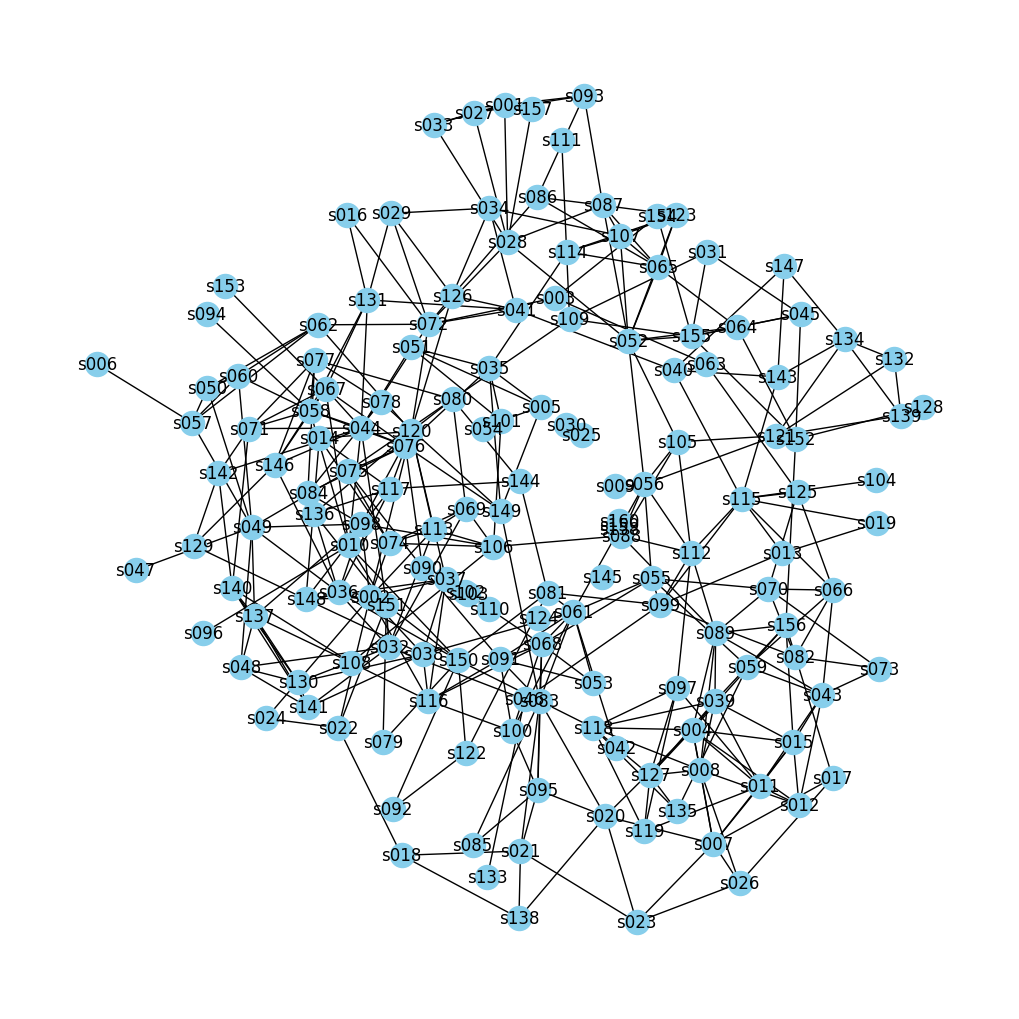

In [9]:
plt.figure(figsize=(10,10))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

In [10]:
from IPython.core.display import display, HTML

In [11]:
!pip install pyvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 11.5 MB/s eta 0:00:00


In [43]:
from pyvis.network import Network
net = Network(notebook = True, cdn_resources='in_line', width="1000px", height="700px", bgcolor='#222222', font_color='white', directed=True)

node_degree = dict(G.degree)

#Setting up node size attribute
nx.set_node_attributes(G, node_degree, 'size')

net.from_nx(G)
net.show("glasgow_friendships.html")
display(HTML('glasgow_friendships.html'))

glasgow_friendships.html


## Add Smoking Behaviours to Network, t=2

In [13]:
smoking_t2 = pd.DataFrame(glasgow_substances['tobacco']['t2']).fillna(0)

In [14]:
list(set(smoking_t2['t2'].to_list())) # check smoking dependency

[0, 1, 2, 3]

In [15]:
smoking_t2.index.rename('student', inplace=True)

In [16]:
G.nodes

NodeView(('s001', 's002', 's003', 's004', 's005', 's006', 's007', 's008', 's009', 's010', 's011', 's012', 's013', 's014', 's015', 's016', 's017', 's018', 's019', 's020', 's021', 's022', 's023', 's024', 's025', 's026', 's027', 's028', 's029', 's030', 's031', 's032', 's033', 's034', 's035', 's036', 's037', 's038', 's039', 's040', 's041', 's042', 's043', 's044', 's045', 's046', 's047', 's048', 's049', 's050', 's051', 's052', 's053', 's054', 's055', 's056', 's057', 's058', 's059', 's060', 's061', 's062', 's063', 's064', 's065', 's066', 's067', 's068', 's069', 's070', 's071', 's072', 's073', 's074', 's075', 's076', 's077', 's078', 's079', 's080', 's081', 's082', 's083', 's084', 's085', 's086', 's087', 's088', 's089', 's090', 's091', 's092', 's093', 's094', 's095', 's096', 's097', 's098', 's099', 's100', 's101', 's102', 's103', 's104', 's105', 's106', 's107', 's108', 's109', 's110', 's111', 's112', 's113', 's114', 's115', 's116', 's117', 's118', 's119', 's120', 's121', 's122', 's123', 's124'

In [17]:
nx.set_node_attributes(G, values = smoking_t2, name='student')

In [18]:
# Merge the DataFrame with the graph based on 'node_id'
merged_data = pd.merge(pd.DataFrame(G.nodes), smoking_t2, left_index=True, right_index=True)

# Map 'smoking_t2' values to a dictionary for easier assignment
smoking_t2_dict = smoking_t2['t2'].to_dict()

# Add 'smoking_t2' as a node attribute
nx.set_node_attributes(G, smoking_t2_dict, 'smoking_t2')

# Print the node attributes to verify
#for node, attrs in G.nodes(data=True):
    #print(f"Node {node}: {attrs}")


In [19]:
from IPython.display import display, HTML
from pyvis.network import Network
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# Your network graph 'G' is assumed to be defined before this code snippet

# Create a pyvis network
pyvis_graph = Network(notebook=True, cdn_resources='in_line', width="1000px", height="700px", bgcolor='#222222', font_color='white', directed=True)

# Get 'smoking_t2' values and indegree for each node
smoking_t2_values = [attrs.get('smoking_t2', None) for _, attrs in G.nodes(data=True)]
node_sizes = dict(G.degree)

# Choose a colormap (e.g., 'coolwarm') for the gradient
colormap = cm.Oranges

# Normalize 'smoking_t2' values to the range [0, 1]
norm = mcolors.Normalize(vmin=min(smoking_t2_values), vmax=max(smoking_t2_values))

# Map 'smoking_t2' values to colors using the colormap
node_colors = [cm.colors.to_hex(colormap(norm(value))) if value is not None else '#808080' for value in smoking_t2_values]

# Set node sizes based on indegree

# Add nodes with specified colors, sizes, and labels using the add_node function
for (node, attrs), color in zip(G.nodes(data=True), node_colors):
    label = f"{node}\nSmoking: {attrs.get('smoking_t2', 'N/A')}"
    pyvis_graph.add_node(node, label=label, color=color, size=node_sizes[node])

# Add edges to the pyvis graph
for edge in G.edges():
    pyvis_graph.add_edge(edge[0], edge[1])

# Save the pyvis graph to an HTML file
html_file_path = 'graph.html'
pyvis_graph.show(html_file_path)

# Display the HTML file inline in the notebook
display(HTML(html_file_path))


graph.html


## Add Alcohol Use attributes to Network

In [36]:
alcohol_t2 = pd.DataFrame(glasgow_substances['alcohol']['t2']).fillna(0)

In [37]:
list(set(alcohol_t2['t2'].to_list())) # check smoking dependency

[0, 1, 2, 3, 4, 5]

In [38]:
alcohol_t2.index.rename('student', inplace=True)

In [39]:
G.nodes

NodeView(('s001', 's002', 's003', 's004', 's005', 's006', 's007', 's008', 's009', 's010', 's011', 's012', 's013', 's014', 's015', 's016', 's017', 's018', 's019', 's020', 's021', 's022', 's023', 's024', 's025', 's026', 's027', 's028', 's029', 's030', 's031', 's032', 's033', 's034', 's035', 's036', 's037', 's038', 's039', 's040', 's041', 's042', 's043', 's044', 's045', 's046', 's047', 's048', 's049', 's050', 's051', 's052', 's053', 's054', 's055', 's056', 's057', 's058', 's059', 's060', 's061', 's062', 's063', 's064', 's065', 's066', 's067', 's068', 's069', 's070', 's071', 's072', 's073', 's074', 's075', 's076', 's077', 's078', 's079', 's080', 's081', 's082', 's083', 's084', 's085', 's086', 's087', 's088', 's089', 's090', 's091', 's092', 's093', 's094', 's095', 's096', 's097', 's098', 's099', 's100', 's101', 's102', 's103', 's104', 's105', 's106', 's107', 's108', 's109', 's110', 's111', 's112', 's113', 's114', 's115', 's116', 's117', 's118', 's119', 's120', 's121', 's122', 's123', 's124'

In [40]:
nx.set_node_attributes(G, values = alcohol_t2, name='student')

In [41]:
# Merge the DataFrame with the graph based on 'node_id'
merged_data = pd.merge(pd.DataFrame(G.nodes), alcohol_t2, left_index=True, right_index=True)

# Map 'smoking_t2' values to a dictionary for easier assignment
alcohol_t2_dict = alcohol_t2['t2'].to_dict()

# Add 'smoking_t2' as a node attribute
nx.set_node_attributes(G, alcohol_t2_dict, 'alcohol_t2')

# Print the node attributes to verify
#for node, attrs in G.nodes(data=True):
    #print(f"Node {node}: {attrs}")


In [42]:
from IPython.display import display, HTML
from pyvis.network import Network
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# Your network graph 'G' is assumed to be defined before this code snippet

# Create a pyvis network
pyvis_graph = Network(notebook=True, cdn_resources='in_line', width="1000px", height="700px", bgcolor='#222222', font_color='white', directed=True)

# Get 'smoking_t2' values and indegree for each node
alcohol_t2_values = [attrs.get('alcohol_t2', None) for _, attrs in G.nodes(data=True)]
node_sizes = dict(G.degree)

# Choose a colormap (e.g., 'coolwarm') for the gradient
# append _r to reverse any colormap gradient
# https://matplotlib.org/stable/gallery/color/colormap_reference.html
colormap = cm.winter_r

# Normalize 'smoking_t2' values to the range [0, 1]
norm = mcolors.Normalize(vmin=min(alcohol_t2_values), vmax=max(alcohol_t2_values))

# Map 'smoking_t2' values to colors using the colormap
node_colors = [cm.colors.to_hex(colormap(norm(value))) if value is not None else '#808080' for value in smoking_t2_values]

# Set node sizes based on indegree

# Add nodes with specified colors, sizes, and labels using the add_node function
for (node, attrs), color in zip(G.nodes(data=True), node_colors):
    label = f"{node}\nAlcohol: {attrs.get('alcohol_t2', 'N/A')}"
    pyvis_graph.add_node(node, label=label, color=color, size=node_sizes[node])

# Add edges to the pyvis graph
for edge in G.edges():
    pyvis_graph.add_edge(edge[0], edge[1])

# Save the pyvis graph to an HTML file
html_file_path = 'graph_alcohol.html'
pyvis_graph.show(html_file_path)

# Display the HTML file inline in the notebook
display(HTML(html_file_path))


graph_alcohol.html
